In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

It contains only numerical input variables which are the result of a PCA(Principal Component Analysis) transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

---


**Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.**

---


**The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.**

---


**Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

In [3]:
df=pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print(df.shape)

(284807, 31)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df=df.sample(frac=1,random_state=42)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [8]:
test=df.tail(56962)
print(test.shape)
test.tail()

(56962, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98,0
259178,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23,0
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94,0
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00,0
121958,76381.0,1.233174,-0.784851,0.386784,-0.698559,-1.034018,-0.637028,-0.502369,-0.188057,-0.749637,...,0.027634,-0.234522,-0.059544,-0.109073,0.290326,-0.393074,0.001217,0.038588,113.00,0


In [9]:
df=df.head(227845)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166978,118418.0,0.039574,0.747010,0.098041,-0.806212,0.615727,-0.548374,0.838212,0.020500,-0.136691,...,-0.251461,-0.619013,0.005320,-0.523766,-0.486633,0.153365,0.237510,0.080317,1.98,0
251118,155226.0,-2.169007,1.869922,-1.706489,-0.672649,0.271257,-1.057522,0.184034,0.578133,1.108769,...,-0.491087,-1.070523,0.048976,0.463935,-0.252957,0.094892,0.081812,0.103395,8.99,0
13232,23276.0,-1.636799,-0.288001,3.044085,2.155079,-0.764045,0.924178,-0.724145,0.297774,2.620092,...,-0.193612,0.515240,0.016859,0.388790,-0.112184,-0.140346,-0.021988,0.143122,78.13,0
49834,44233.0,1.239340,-0.152563,-0.103219,-0.000806,-0.146956,-0.168999,-0.112986,0.119254,0.257984,...,-0.050855,-0.076214,-0.086878,-0.249568,0.432091,1.128364,-0.092260,-0.027886,2.00,0


In [10]:
train=df.sample(frac=0.8)
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
198172,132364.0,0.039147,0.884311,0.139881,-0.824269,0.795817,-0.507598,0.961718,-0.088291,-0.427934,...,-0.229494,-0.461261,-0.019393,-0.470837,-0.421579,0.146937,0.250313,0.084485,0.89,0
133582,80449.0,-3.678157,-4.766660,0.865710,0.604168,3.599027,-3.363488,-3.053562,-0.009113,-0.646865,...,0.155746,0.825982,-0.601439,0.228325,-0.908136,-0.061384,0.793317,-0.060717,125.75,0
211113,138268.0,-1.089606,-0.926034,1.880891,-2.159784,0.995310,1.129398,-0.494279,0.425020,-1.039325,...,0.451745,1.278548,-0.323586,-1.382780,0.448368,0.106225,-0.111291,-0.181889,29.95,0
24912,33437.0,-0.798088,-0.570571,1.386897,-1.868400,0.372291,1.435659,-0.101362,0.583270,1.934072,...,-0.126460,-0.069344,-0.137099,-1.686580,0.115827,-0.796146,0.199254,0.134455,80.00,0
18912,29861.0,-1.101839,0.478693,1.800158,-0.617546,-0.082720,-0.712336,1.488370,-0.257779,-0.579438,...,-0.452586,-1.433931,0.173148,0.449468,-0.017847,-0.166866,-0.298316,-0.190384,124.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284487,172488.0,1.983678,-0.211915,-0.262973,0.429504,-0.555986,-0.605424,-0.390276,-0.125234,1.110174,...,-0.166564,-0.259202,0.358319,-0.097286,-0.394993,-0.618435,0.046022,-0.029705,5.75,0
232345,147135.0,-1.189794,0.275959,1.242050,-1.106573,1.411965,-0.919281,0.732646,0.027534,-0.690228,...,-0.210258,-0.877926,-0.257245,-0.347424,0.601528,0.237892,-0.090446,0.034820,1.98,0
194086,130435.0,0.821213,-3.269474,-2.448488,-0.666957,0.612344,4.167348,-0.786369,0.848275,-0.138552,...,0.287608,-0.100545,-0.346822,0.749770,-0.491267,0.413433,-0.088804,0.066327,664.66,0
225354,144214.0,2.058499,0.234680,-1.671212,0.405777,0.550005,-0.777076,0.266121,-0.288415,0.289872,...,-0.339777,-0.810100,0.330386,0.544999,-0.232836,0.170492,-0.051514,-0.027301,5.36,0


In [11]:
validation = df[~df.index.isin(train.index)]
print(validation.dtypes)
print(validation.count())

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Time      45569
V1        45569
V2        45569
V3        45569
V4        45569
V5        45569
V6        45569
V7        45569
V8        45569
V9        45569
V10       45569
V11       45569
V12       45569
V13       45569
V14       45569
V15       45569
V16       45569
V17       45569
V18       45569
V19       45569
V20       45569
V21       45569
V22       45569
V23       45569
V24       45569
V25       45569
V26       45

Data Cleaning

In [12]:
train.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

291 181985


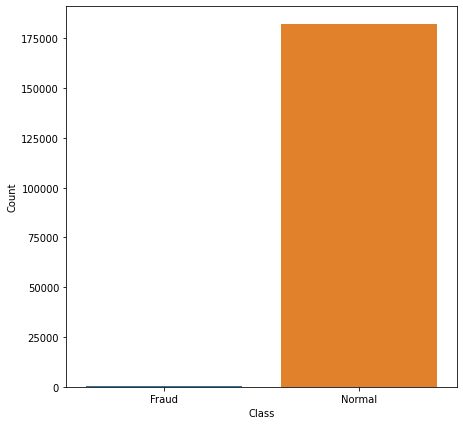

In [13]:
plt.figure(figsize=(7, 7))
fraud_count=train[train['Class']==1]['Class'].count()
normal_count=train[train['Class']==0]['Class'].count()
print(fraud_count,normal_count)
sns.barplot(y=[fraud_count,normal_count],x=['Fraud','Normal'])
plt.xlabel('Class')
plt.ylabel('Count')
# Show the plot
plt.show()

In [14]:
fraud_data=train[train['Class']==1]
normal_data=train[train['Class']==0]
print(fraud_data.shape,normal_data.shape)
print(normal_data.Amount[normal_data.Amount>10000])

(291, 31) (181985, 31)
284249    10199.44
Name: Amount, dtype: float64


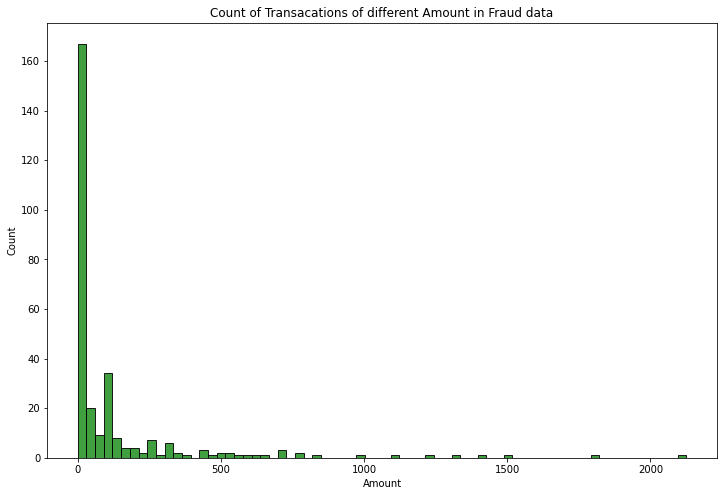

In [15]:
plt.figure(figsize=(12,8))
sns.histplot(data=fraud_data, x='Amount', color='green')
plt.title('Count of Transacations of different Amount in Fraud data')
plt.show()

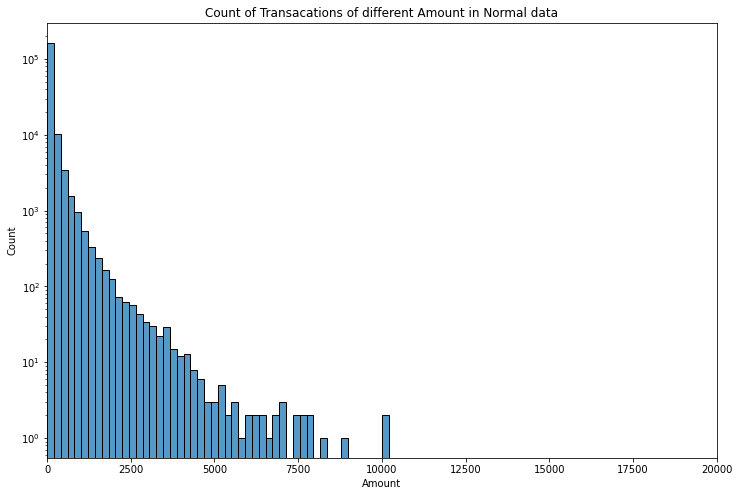

In [16]:
plt.figure(figsize=(12,8))
sns.histplot(data=normal_data, x='Amount', bins=50)
plt.title('Count of Transacations of different Amount in Normal data')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression(max_iter=5000)

In [19]:
y_data=train['Class']
x_data=train.drop('Class',axis=1)
y_val_data=validation['Class']
x_val_data=validation.drop('Class',axis=1)
print(y_data.shape)
print(x_data.head())


(182276,)
            Time        V1        V2        V3        V4        V5        V6  \
198172  132364.0  0.039147  0.884311  0.139881 -0.824269  0.795817 -0.507598   
133582   80449.0 -3.678157 -4.766660  0.865710  0.604168  3.599027 -3.363488   
211113  138268.0 -1.089606 -0.926034  1.880891 -2.159784  0.995310  1.129398   
24912    33437.0 -0.798088 -0.570571  1.386897 -1.868400  0.372291  1.435659   
18912    29861.0 -1.101839  0.478693  1.800158 -0.617546 -0.082720 -0.712336   

              V7        V8        V9  ...       V20       V21       V22  \
198172  0.961718 -0.088291 -0.427934  ...  0.049496 -0.229494 -0.461261   
133582 -3.053562 -0.009113 -0.646865  ... -0.595591  0.155746  0.825982   
211113 -0.494279  0.425020 -1.039325  ...  0.313114  0.451745  1.278548   
24912  -0.101362  0.583270  1.934072  ...  0.066823 -0.126460 -0.069344   
18912   1.488370 -0.257779 -0.579438  ... -0.117049 -0.452586 -1.433931   

             V23       V24       V25       V26       V27  

In [20]:
model.fit(x_data, y_data)

LogisticRegression(max_iter=5000)

In [21]:
predictions = model.predict(x_val_data)

MLP Classifier

In [22]:
from sklearn.neural_network import MLPClassifier



*   hidden_layer_sizes : This parameter allows us to set the number of layers and the number of nodes we wish to have in the Neural Network Classifier. Each element in the tuple represents the number of nodes at the ith position where i is the index of the tuple. Thus the length of tuple denotes the total number of hidden layers in the network.
*   max_iter: It denotes the number of epochs.


*   activation: The activation function for the hidden layers.
*   solver: This parameter specifies the algorithm for weight optimization across the nodes.
*   random_state: The parameter allows to set a seed for reproducing the same results








In [23]:
classifier = MLPClassifier(hidden_layer_sizes=(10,2), max_iter=100,activation = 'relu',solver='adam',random_state=1)

In [24]:
X_train = train.iloc[:,0:-1].values
Y_train = train.iloc[:,-1].values
X_val = validation.iloc[:,0:-1].values
y_val = validation.iloc[:,-1].values

In [25]:
classifier.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(10, 2), max_iter=100, random_state=1)

In [26]:
#Predicting y for X_val
y_pred = classifier.predict(X_val)

Confusion Matrix is a performance measurement for machine learning classification.
[Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)
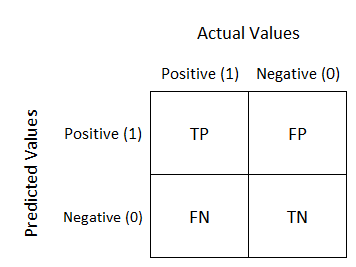

In [27]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm=confusion_matrix(y_val,y_pred)
tn, fp, fn, tp = confusion_matrix(y_val,y_pred).ravel()
#print(cm)

In [28]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements
#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.9978933046588689


In [29]:
def recall(confusion_matrix):
  # return (confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
  return tp/(tp+fn)

def precision(confusion_matrix):
  # return (confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))
  return tp/(tp+fp)
      

In [30]:
rec=recall(cm)
pre=precision(cm)
print(rec)
print(pre)
# print(recall_score(y_val,y_pred))

0.0
nan


<ipython-input-29-024ba3688ee8>:7: RuntimeWarning: invalid value encountered in longlong_scalars
  return tp/(tp+fp)


In [31]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [33]:
values_recall=[]
values_precision=[]
val_iter=[]
values_recall_lib=[]
values_precision_lib=[]
for i in range(25,325,25):
  val_iter.append(i)
  classifier = MLPClassifier(hidden_layer_sizes=(10,2), max_iter=i,activation = 'relu',solver='adam',random_state=1)
  classifier.fit(X_train, Y_train)
  y_pred = classifier.predict(X_val)
  cm = confusion_matrix(y_val,y_pred)
  # values_recall_lib.append(recall_score(y_val,y_pred))
  # values_precision_lib.append(precision_score(y_val,y_pred))
  values_recall.append(recall(cm))
  values_precision.append(precision(cm))

print(values_recall)
print(values_precision)

<ipython-input-29-024ba3688ee8>:7: RuntimeWarning: invalid value encountered in longlong_scalars
  return tp/(tp+fp)
<ipython-input-29-024ba3688ee8>:7: RuntimeWarning: invalid value encountered in longlong_scalars
  return tp/(tp+fp)
<ipython-input-29-024ba3688ee8>:7: RuntimeWarning: invalid value encountered in longlong_scalars
  return tp/(tp+fp)
<ipython-input-29-024ba3688ee8>:7: RuntimeWarning: invalid value encountered in longlong_scalars
  return tp/(tp+fp)
<ipython-input-29-024ba3688ee8>:7: RuntimeWarning: invalid value encountered in longlong_scalars
  return tp/(tp+fp)
<ipython-input-29-024ba3688ee8>:7: RuntimeWarning: invalid value encountered in longlong_scalars
  return tp/(tp+fp)
<ipython-input-29-024ba3688ee8>:7: RuntimeWarning: invalid value encountered in longlong_scalars
  return tp/(tp+fp)
<ipython-input-29-024ba3688ee8>:7: RuntimeWarning: invalid value encountered in longlong_scalars
  return tp/(tp+fp)
<ipython-input-29-024ba3688ee8>:7: RuntimeWarning: invalid value

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


<ipython-input-29-024ba3688ee8>:7: RuntimeWarning: invalid value encountered in longlong_scalars
  return tp/(tp+fp)


[0.9980030283745529, 0.9980030283745529, 0.9980030283745529, 0.9980030283745529, 0.9980030283745529, 0.9980030283745529, 0.9980030283745529, 0.9980030283745529, 0.9980030283745529, 0.9980030283745529, 0.9980030283745529, 0.9980030283745529]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


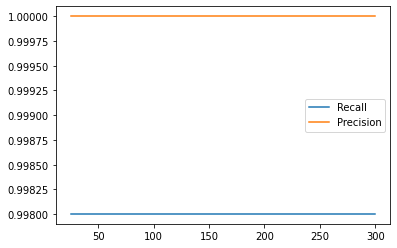

In [ ]:
print(values_recall)
print(values_precision)

# print(values_recall_lib)
# print(values_precision_lib)

plt.plot(val_iter,values_recall)
plt.plot(val_iter,values_precision)
# plt.plot(val_iter,values_recall_lib)
# plt.plot(val_iter,values_precision_lib)

plt.legend(['Recall','Precision'])
plt.show()